<a href="https://colab.research.google.com/github/mrm8488/keras-ocr/blob/master/keras_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras OCR
A packaged and flexible version of the CRAFT text detector and Keras CRNN recognition model

based on the project https://github.com/faustomorales/keras-ocr

> Colab by [mrm8488](https://twitter.com/mrm8488)



In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
!pip install keras-ocr

In [0]:
import matplotlib.pyplot as plt
import keras_ocr

In [0]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [0]:
# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/e/e8/FseeG2QeLXo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]
]

In [0]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time prediction_groups = pipeline.recognize(images)

CPU times: user 5.72 s, sys: 2.08 s, total: 7.81 s
Wall time: 7.79 s


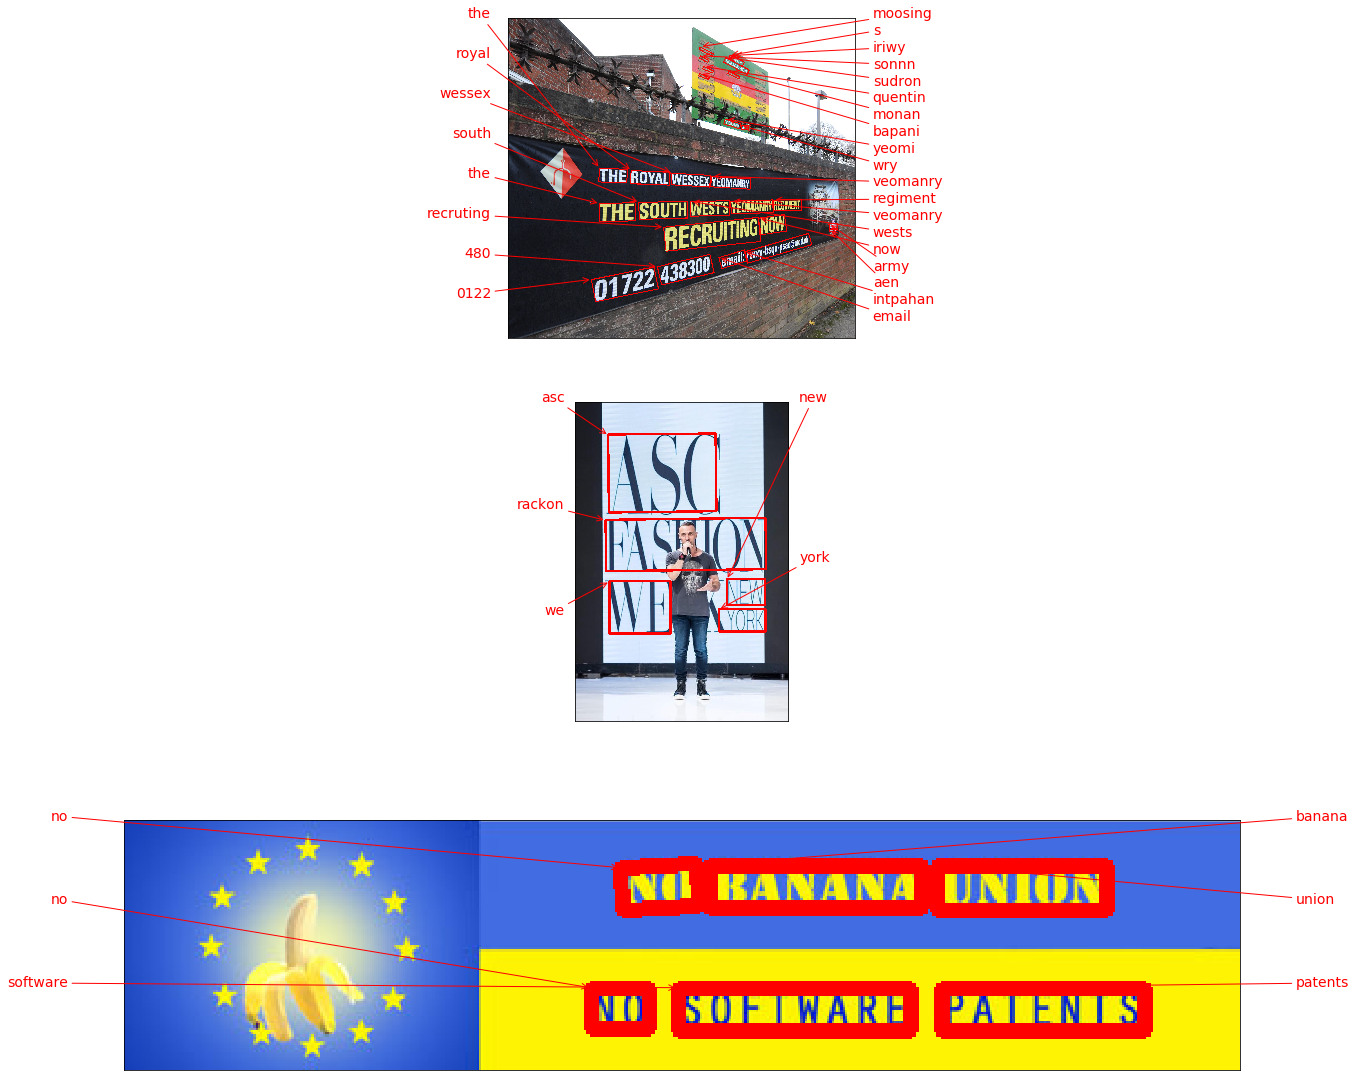

In [0]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)